# Python Plotting Basics

* Ref: [https://towardsdatascience.com/python-plotting-basics-simple-charts-with-matplotlib-seaborn-and-plotly-e36346952a3a](https://towardsdatascience.com/python-plotting-basics-simple-charts-with-matplotlib-seaborn-and-plotly-e36346952a3a)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager
# %matplotlib inline

# import plotly.plotly as py
# import plotly.graph_objs as go
# plotly.tools.set_credentials_file(username='***', api_key='***')

In [ ]:
df = pd.DataFrame(
    [['A', 'Have been told they are too aggressive', 84],
     ['B', 'felt excluded from key social/networking opportunities because of genter', 66],
     ['C', 'witnessed sexist behavior at company offsites and/or industry conferences', 90],
     ['D', 'have experienced clients/colleagues address questions to male peers that should have been addressed to them', 88],
     ['E', 'were asked about family life, martial status and children in interviews', 75],
     ['F', '[%] of women in tech reported unwanted sexual advances', 60]],
    columns=['Q Code', 'Question', 'Percentage of Respondents'])

In [ ]:
df

,Q Code,Question,Percentage of Respondents
0,A,Have been told they are too aggressive,84
1,B,felt excluded from key social/networking oppor...,66
2,C,witnessed sexist behavior at company offsites ...,90
3,D,have experienced clients/colleagues address qu...,88
4,E,"were asked about family life, martial status a...",75
5,F,[%] of women in tech reported unwanted sexual ...,60


### 畫 bar 圖

[0 1 2 3 4 5]


/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


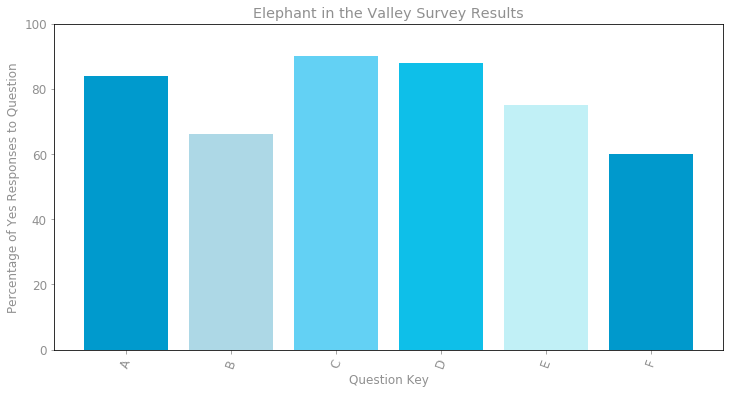

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#909090'
plt.rcParams['axes.labelcolor'] = '#909090'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size'] = 12

color_palette_list = ['#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9', '#C1F0F6', '#0099CC']

ind = np.arange(len(df['Question']))
print(ind)

bars1 = ax.bar(ind, df['Percentage of Respondents'],
               color=color_palette_list,
               label='Percentage of yes responses to question')
ax.set_title('Elephant in the Valley Survey Results')
ax.set_ylabel('Percentage of Yes Responses to Question')
ax.set_ylim((0, 100))
ax.set_xticks(range(0, len(ind)))
ax.set_xticklabels(list(df['Q Code']), rotation=70)
ax.set_xlabel('Question Key')
plt.show()

### 畫 pie 圖

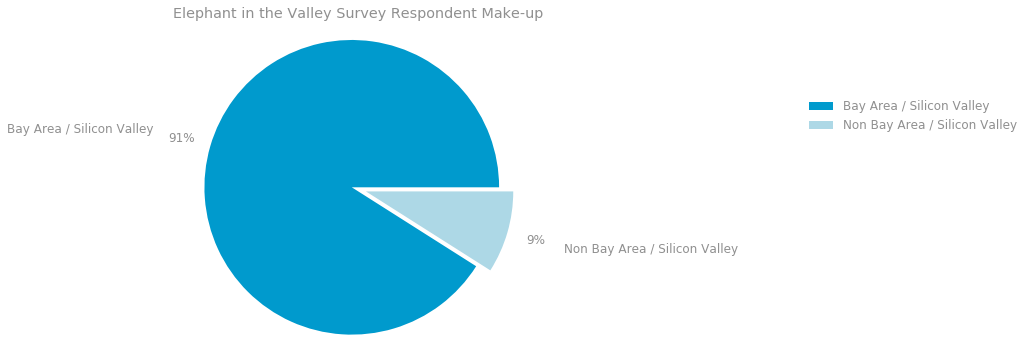

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#909090'
plt.rcParams['axes.labelcolor'] = '#909090'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size'] = 12

labels = ['Bay Area / Silicon Valley',
          'Non Bay Area / Silicon Valley']
percentages = [91, 9]
explode=(0.1, 0)

ax.pie(percentages, explode=explode, labels=labels,
       colors=color_palette_list[0:2], autopct='%1.0f%%',
       shadow=False, startangle=0,
       pctdistance=1.2, labeldistance=1.4)
ax.axis('equal') # 圓形 pit 圖
ax.set_title('Elephant in the Valley Survey Respondent Make-up')
ax.legend(frameon=False, bbox_to_anchor=(1.5, 0.8))
plt.show()

### 用 Seaborn 畫 bar 圖

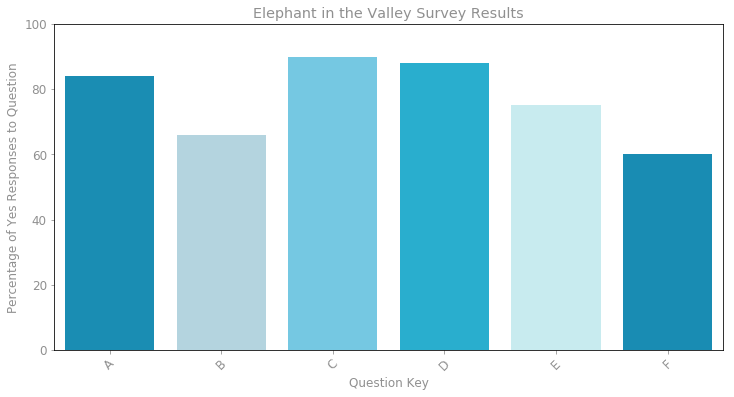

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#909090'
plt.rcParams['axes.labelcolor'] = '#909090'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size'] = 12

ind = np.arange(len(df['Question']))

color_palette_list = ['#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9', '#C1F0F6', '#0099CC']

sns.barplot(x=df['Q Code'], y=df['Percentage of Respondents'],
            data=df, palette=color_palette_list,
            label='Percentage of yes responses to question',
            ax=ax, ci=None)

ax.set_title('Elephant in the Valley Survey Results')
ax.set_ylabel('Percentage of Yes Responses to Question')
ax.set_ylim(0, 100)
ax.set_xlabel('Question Key')
ax.set_xticks(range(0, len(ind)))
ax.set_xticklabels(list(df['Q Code']), rotation=45)
plt.show()

### 用 plotly 畫 bar 圖

In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go

color_palette_list = ['#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9', '#C1F0F6', '#0099CC']

trace = go.Bar(x=df['Q Code'],
               y=df['Percentage of Responses'],
               marker=dict(color_palette_list))

data = [trace]

layout = go.Layout(
    title='Elephant in the Valley Survey Results',
    font=dict(color='#909090'),
    xaxis=dict(title='Question Key',
               titlefont=dict(family='Arial, sans-serif',
                              size=12,
                              color='#909090'),
               showticklabels=True,
               tickangle=-45,
               tickfont=dict(family='Arial, sans-serif',
                             size=12,
                             color='#909090')
               ),
    yaxis=dict(range=[0, 100],
               title='Percentage of Yes Responses to Question',
               titlefont=dict(family='Arial, sans=serif',
                              size=12,
                              color='#909090'),
               showticklabels=True,
               tickangle=0,
               tickfont=dict(family='Arial, sans-serif',
                             size=12,
                             color='#909090')
               )
    )

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='barplot-elephant-in-the-valley')

### 用 plotly 畫 pie 圖

In [ ]:
labels = ['Bay Area / Silicon Valley',
          'Non Bay Area / Silicon Valley']
percentages = [91, 9]

trace = go.Pie(labels=labels,
               hoverinfo='label+percent',
               values=percentages,
               textposition='outside',
               marker=dict(colors=color_palette_list[0:2]),
               rotation=90)

layout = go.Layout(title='Elephant in the Valley Survey Respondent Make-up',
                   font=dict(family='Arial',
                             size=12,
                             color='#909090'),
                   legend=dict(x=0.9, y=0.5)
                   )

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='basic_pie_chart_elephant_in_the_valley')
